### 1.Preparing steps

##### Import libs

In [ ]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

##### Load data

In [3]:
data_path = ['C:/kaggle projects/Titanic - Machine Learning from Disaster']
train_data = os.sep.join(data_path + ['train.csv'])
test_data = os.sep.join(data_path + ['test.csv'])
train_orig = pd.read_csv(train_data, sep = ',')
test_orig = pd.read_csv(test_data, sep = ',')

In [5]:
trian_ID = train_orig['PassengerId']
test_ID = test_orig['PassengerId']

train = train_orig.drop('PassengerId', axis = 1)
test = test_orig.drop('PassengerId', axis = 1)

print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [6]:
n_train = train.shape[0]
n_test = test.shape[0]
y_train = train['Survived']
df = pd.concat((train, test)).reset_index(drop = True)

### 2.EDA

In [7]:
train_orig['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [10]:
df.dtypes

Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


##### Correlation checking

In [12]:
num_col = df.select_dtypes(exclude=['object']).columns

<AxesSubplot:>

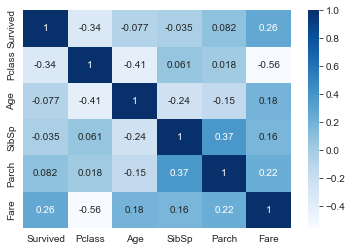

In [13]:
correlation = df[num_col].corr()
sns.set_style('darkgrid')
sns.heatmap(correlation, cmap = 'Blues', annot = True)

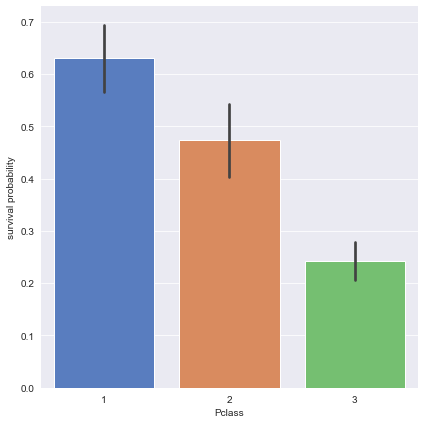

In [14]:
g = sns.catplot(x = 'Pclass', y = 'Survived', data = train, kind = 'bar', size = 6., palette='muted')
g.despine(left = True)
g = g.set_ylabels('survival probability')

In [15]:
df['Pclass'].value_counts().sum()

1309

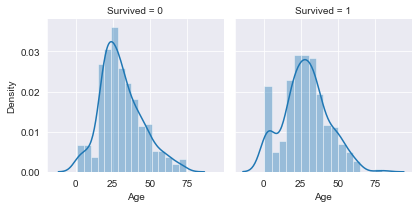

In [16]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, 'Age')


In [17]:
df['Age'].skew()

0.40767455974362266

<AxesSubplot:ylabel='Age'>

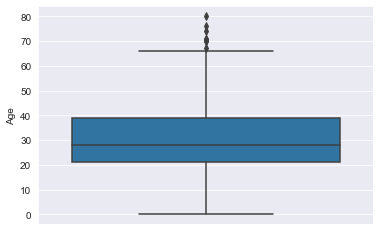

In [18]:
sns.boxplot(y = df['Age'])

In [19]:
train[train.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [20]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [21]:
num_col

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

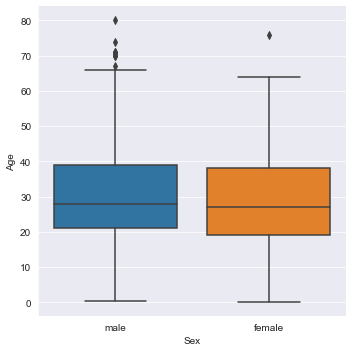

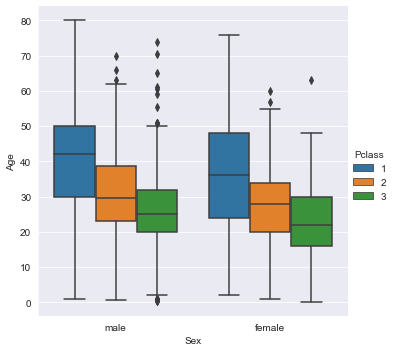

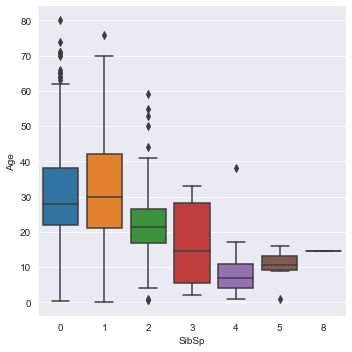

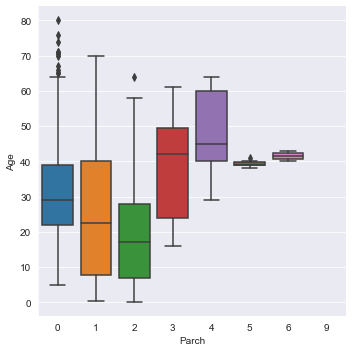

In [22]:
g = sns.factorplot(y = 'Age', x = 'Sex', data = df, kind = 'box')
g = sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', data = df, kind = 'box')
g = sns.factorplot(y = 'Age', x = 'SibSp', data = df, kind = 'box')
g = sns.factorplot(y = 'Age', x = 'Parch', data = df, kind = 'box')

In [23]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

<AxesSubplot:>

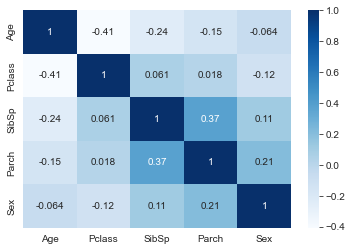

In [24]:

correlation = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Sex']].corr()
sns.set_style('darkgrid')
sns.heatmap(correlation, cmap = 'Blues', annot = True)


##### Data manipulating

In [25]:
index_null_age = list(df[df['Age'].isnull()].index)

In [26]:
for i in index_null_age:
    age_med = df['Age'].median()
    age_pred = df['Age'][(df['SibSp'] == df.iloc[i]['SibSp']) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"])].median()
    if not np.isnan(age_pred):
        df['Age'].iloc[i] = age_pred
    else:
        df['Age'].iloc[i] = age_med   
 


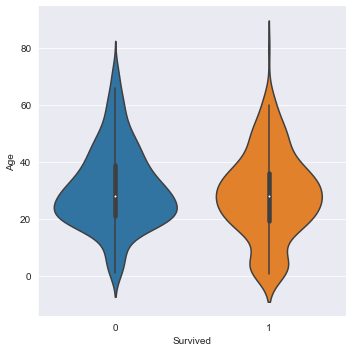

In [27]:
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="violin")

In [28]:
df['Cabin'][df['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [29]:
df['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [30]:
df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for i in df['Cabin'])

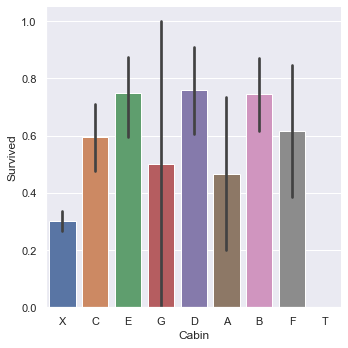

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.factorplot(x = 'Cabin', y = 'Survived', data = df, kind = 'bar')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   int64  
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     1309 non-null   object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [33]:
df['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

In [34]:
df['Fare'].iloc[1043] = df['Fare'][(df['SibSp'] == df.iloc[1043]['SibSp']) & (df['Parch'] == df.iloc[1043]["Parch"]) & (df['Embarked'] == df.iloc[1043]["Embarked"]) & (df['Cabin'] == df.iloc[1043]["Cabin"]) 
& (df['Pclass'] == df.iloc[1043]["Pclass"])].median()

In [35]:
df[df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   int64  
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     1309 non-null   object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [37]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B,NaN


In [38]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [39]:
df['Embarked'] = df['Embarked'].fillna('S')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   int64  
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     1309 non-null   object 
 10  Embarked  1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [41]:
df = pd.get_dummies(df, columns= ['Cabin'], prefix = 'Cabin')
df = pd.get_dummies(df, columns= ['Embarked'], prefix = 'Embarked')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Sex         1309 non-null   int64  
 4   Age         1309 non-null   float64
 5   SibSp       1309 non-null   int64  
 6   Parch       1309 non-null   int64  
 7   Ticket      1309 non-null   object 
 8   Fare        1309 non-null   float64
 9   Cabin_A     1309 non-null   uint8  
 10  Cabin_B     1309 non-null   uint8  
 11  Cabin_C     1309 non-null   uint8  
 12  Cabin_D     1309 non-null   uint8  
 13  Cabin_E     1309 non-null   uint8  
 14  Cabin_F     1309 non-null   uint8  
 15  Cabin_G     1309 non-null   uint8  
 16  Cabin_T     1309 non-null   uint8  
 17  Cabin_X     1309 non-null   uint8  
 18  Embarked_C  1309 non-null   uint8  
 19  Embarked_Q  1309 non-null  

In [43]:
df['Ticket'].value_counts()


CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [44]:
Ticket = []
for i in list(df['Ticket']):
    if not i.isdigit():
        Ticket.append(i.replace('.','').replace('/', '').strip().split(' ')[0])
    else: 
        Ticket.append('X')

df['Ticket'] = Ticket




In [45]:
df = pd.get_dummies(df, columns = ['Ticket'], prefix = 'T')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Sex         1309 non-null   int64  
 4   Age         1309 non-null   float64
 5   SibSp       1309 non-null   int64  
 6   Parch       1309 non-null   int64  
 7   Fare        1309 non-null   float64
 8   Cabin_A     1309 non-null   uint8  
 9   Cabin_B     1309 non-null   uint8  
 10  Cabin_C     1309 non-null   uint8  
 11  Cabin_D     1309 non-null   uint8  
 12  Cabin_E     1309 non-null   uint8  
 13  Cabin_F     1309 non-null   uint8  
 14  Cabin_G     1309 non-null   uint8  
 15  Cabin_T     1309 non-null   uint8  
 16  Cabin_X     1309 non-null   uint8  
 17  Embarked_C  1309 non-null   uint8  
 18  Embarked_Q  1309 non-null   uint8  
 19  Embarked_S  1309 non-null  

In [47]:
list(df['Name'])

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [48]:
Names = []
for i in  list(df['Name']): 
    Names.append(i.split(',')[1].strip().split('.')[0])
df['Name'] = Names

In [49]:
df['Name'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name, dtype: int64

In [50]:
df.iloc[[759],[2]] = 'Miss'
df.iloc[[1305],[2]] = 'Miss'
df.iloc[[822],[2]] = 'Master'
df.iloc[[745],[2]] = 'Mr'
df.iloc[[30],[2]] = 'Mr'
df.iloc[[369],[2]] = 'Miss'
df.iloc[[599],[2]] = 'Mr'
df.iloc[[556],[2]] = 'Mrs'
df.iloc[[[443,979]],[2]] = 'Miss'
df.iloc[[[449,536]],[2]] = 'Mr'
df.iloc[[[641,710]],[2]] = 'Miss'
df.iloc[[[647,694,1022,1093]],[2]] = 'Mr'
df.iloc[[[245,317,398,632,660,766,796,1184]],[2]] = 'Mr'
df.iloc[[[149,150,249,626,848,886,1040,1055]],[2]] = 'Mr'

In [51]:
df['Name'].value_counts()

Mr        782
Miss      267
Mrs       198
Master     62
Name: Name, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Sex         1309 non-null   int64  
 4   Age         1309 non-null   float64
 5   SibSp       1309 non-null   int64  
 6   Parch       1309 non-null   int64  
 7   Fare        1309 non-null   float64
 8   Cabin_A     1309 non-null   uint8  
 9   Cabin_B     1309 non-null   uint8  
 10  Cabin_C     1309 non-null   uint8  
 11  Cabin_D     1309 non-null   uint8  
 12  Cabin_E     1309 non-null   uint8  
 13  Cabin_F     1309 non-null   uint8  
 14  Cabin_G     1309 non-null   uint8  
 15  Cabin_T     1309 non-null   uint8  
 16  Cabin_X     1309 non-null   uint8  
 17  Embarked_C  1309 non-null   uint8  
 18  Embarked_Q  1309 non-null   uint8  
 19  Embarked_S  1309 non-null  

In [53]:
df = pd.get_dummies(df, columns = ['Name'], prefix = 'Name' )

In [54]:
df.isnull().sum().sum()

418

In [55]:
df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending = False)

Survived    418
dtype: int64

In [56]:
Kfold = StratifiedKFold(n_splits = 10)

In [57]:
train = df[:n_train]
test = df[n_train:]
test.drop('Survived', axis = 1, inplace = True)

In [58]:
train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop("Survived",axis = 1)


##### Baseline models

In [59]:
random_state = 2022
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreeClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train , y = Y_train, scoring= 'accuracy', cv = Kfold, n_jobs = 2))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

In [61]:
#Before log1p ['Fare', 'SibSp', 'Parch']
cv_res.sort_values(by = 'CrossValMeans', ascending = False)

,CrossValMeans,CrossValerrors,Algorithm
5,0.836180,0.031596,GradientBoosting
8,0.831660,0.028794,LogisticRegression
9,0.822697,0.035665,LinearDiscriminantAnalysis
6,0.814806,0.040622,MultipleLayerPerceptron
2,0.811498,0.041083,AdaBoost
3,0.809213,0.045452,RandomForest
1,0.794669,0.047372,DecisionTree
4,0.777840,0.045053,ExtraTrees
7,0.723945,0.031854,KNeighboors
0,0.674607,0.048788,SVC


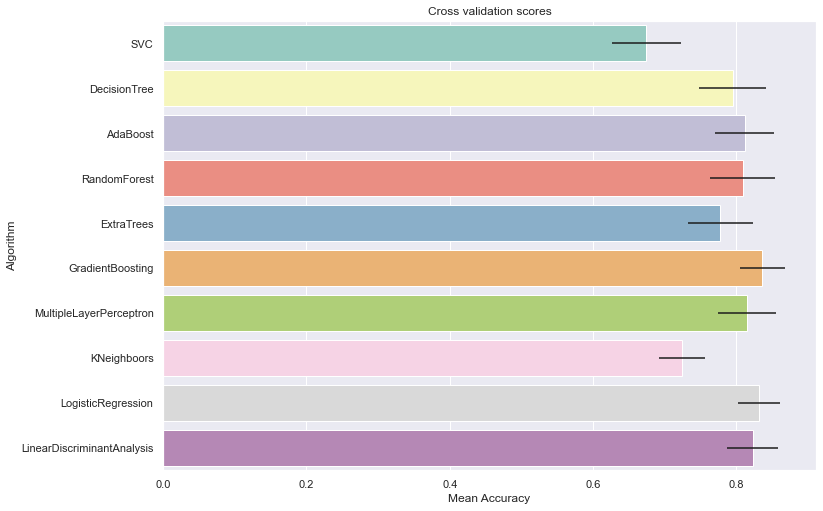

In [61]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

##### Optimization

In [71]:
GBC = GradientBoostingClassifier()
gbc_param_grid = {'loss': ["deviance"],
                'n_estimators' : [100, 200, 300],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                'max_depth': [5, 10],
                'min_samples_leaf': [100,150],
                'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]}
GBC_grid = GridSearchCV(GBC, param_grid= gbc_param_grid, cv = Kfold, n_jobs=-1, verbose = True)

GBC_grid.fit(X_train,Y_train)

GBC_best = GBC_grid.best_estimator_

GBC_grid.best_score_


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


0.8474282147315855

In [73]:
GBC_grid.best_params_

{'learning_rate': 0.6,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': 0.2,
 'min_samples_leaf': 100,
 'n_estimators': 200}

In [59]:
GBC_tuned = GradientBoostingClassifier(learning_rate=0.6, loss='deviance', max_depth=10, max_features=0.2, min_samples_leaf=100, n_estimators=200)
cross_val_score(GBC_tuned, X = X_train, y = Y_train, cv=Kfold, scoring = 'accuracy', n_jobs = -1, verbose = True).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


0.8361797752808988

In [81]:
Logistic = LogisticRegression()
logistic_param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                        'penalty': ['l1', 'l2'],
                        'C': [100, 10, 1.0, 0.1, 0.01]}
logistic_grid = GridSearchCV(Logistic, param_grid = logistic_param_grid, cv = Kfold, n_jobs = -1, verbose = True)

logistic_grid.fit(X_train, Y_train)

logistic_best = logistic_grid.best_estimator_

logistic_grid.best_score_, logistic_grid.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


(0.8327840199750313, {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'})

In [60]:
Logistic_tuned = LogisticRegression(C=10, penalty ='l2', solver = 'lbfgs', n_jobs=-1, verbose=True)
cross_val_score(Logistic_tuned, X = X_train, y = Y_train, cv = Kfold, scoring = 'accuracy', n_jobs = -1, verbose = True).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


0.8327840199750313

In [146]:
LDA = LinearDiscriminantAnalysis()
LDA_pram_grid = {'solver' : ['svd', 'lsqr', 'eigen'],
                  'shrinkage' : [i for i in np.arange(0,1,0.01)]}

LDA_grid = GridSearchCV(LDA, param_grid = LDA_pram_grid, cv = Kfold, n_jobs = -1, verbose = True)

LDA_grid.fit(X_train, Y_train)

LDA_best = LDA_grid.best_params_

LDA_grid.best_score_, LDA_grid.best_estimator_

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


(0.8226966292134831, LinearDiscriminantAnalysis(shrinkage=0.0, solver='lsqr'))

In [61]:
LDA_tuned = LinearDiscriminantAnalysis(shrinkage=0.0, solver='lsqr')
cross_val_score(LDA_tuned, X = X_train, y = Y_train, cv = Kfold, n_jobs=-1, verbose=True).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8226966292134831

In [149]:
MLP = MLPClassifier()

MLP_param_grid = {
                'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'solver': ['lbfgs', 'sgd', 'adam'],
                'alpha': [0.0001, 0.001, 0.01, 0.1],
                'learning_rate': ['constant', 'invscaling', 'adaptive']}
MLP_grid = GridSearchCV(MLP, param_grid = MLP_param_grid, cv = Kfold, n_jobs = -1, verbose = True)

MLP_grid.fit(X_train, Y_train)

MLP_best = MLP_grid.best_params_

MLP_grid.best_score_, MLP_grid.best_estimator_ 

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


(0.8305617977528088,
 MLPClassifier(alpha=0.1, learning_rate='adaptive', solver='lbfgs'))

In [62]:
MLP_tuned = MLPClassifier(alpha = 0.1, learning_rate='adaptive', solver='lbfgs')
cross_val_score(MLP_tuned, X = X_train, y = Y_train, cv = Kfold, n_jobs = -1, verbose = True).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


0.8226841448189763

In [163]:
ADA = AdaBoostClassifier(DecisionTreeClassifier(), random_state=random_state)

ADA_param_grid = {'base_estimator__criterion': ['gini', 'entropy', 'log_loss'],
                'base_estimator__splitter' : ['best', 'random'], 
                'algorithm' : ['SAMME', 'SAMME.R'],
                'n_estimators' : [50, 60, 70, 80, 90, 100],
                'learning_rate' : [i for i in np.arange(0,1, 0.1)]}

ADA_grid = GridSearchCV(ADA, param_grid = ADA_param_grid, cv = Kfold, n_jobs = -1, verbose = 3)

ADA_grid.fit(X_train, Y_train)

ADA_best = ADA_grid.best_params_

ADA_grid.best_score_, ADA_grid.best_estimator_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


(0.8305867665418228,
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                    learning_rate=0.7000000000000001, n_estimators=90,
                    random_state=2022))

In [65]:
random_state = 2022
ADA_tuned = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy',splitter = 'best'),algorithm = 'SAMME.R', learning_rate = 0.7000000000000001, n_estimators = 90, random_state=random_state)
cross_val_score(ADA_tuned, X = X_train , y = Y_train, cv = Kfold, n_jobs=-1, verbose=True).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


0.8305867665418228

### 5.Results

#### Voting classifier

In [66]:
voting_soft = VotingClassifier(estimators=[('gbc', GBC_tuned), ('logistic',Logistic_tuned),('lda',LDA_tuned), ('mlp', MLP_tuned), ('ada', ADA_tuned)],
voting = 'soft',n_jobs = -1)
voting_soft_cv = cross_val_score(voting_soft, X = X_train , y = Y_train, cv = Kfold, n_jobs=-1, verbose=True).mean()
voting_soft.fit(X_train, Y_train)
print(":Soft Voting score mean: {:.2f}". format(voting_soft_cv.mean() * 100))
print(":Soft Voting score std: {:.2f}". format(voting_soft_cv.std() * 100))
print('-'*10)

voting_hard = VotingClassifier(estimators=[('gbc', GBC_tuned), ('logistic',Logistic_tuned),('lda',LDA_tuned), ('mlp', MLP_tuned), ('ada', ADA_tuned)],
voting = 'hard',n_jobs = -1)
voting_hard_cv = cross_val_score(voting_hard, X = X_train , y = Y_train, cv = Kfold, n_jobs=-1, verbose=True).mean()
voting_hard.fit(X_train, Y_train)
print(":Soft Hard score mean: {:.2f}". format(voting_soft_cv.mean() * 100))
print(":Soft Hard score std: {:.2f}". format(voting_soft_cv.std() * 100))
print('-'*10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


:Soft Voting score mean: 84.40
:Soft Voting score std: 0.00
----------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


:Soft Hard score mean: 84.40
:Soft Hard score std: 0.00
----------


In [68]:
test_Survived = pd.Series(voting_soft.predict(test), name = "Survived")
result = pd.concat([test_ID, test_Survived], axis = 1)
result.to_csv("C:/kaggle projects/Titanic - Machine Learning from Disaster/ensemble_python_voting.csv",index=False)